In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from collections import Counter
import random


In [12]:
# Load train, validation, test images
dataroot = "dataroot/"
train_data = pickle.load(open(dataroot+"train.p", "rb" ))
validation_data = pickle.load(open(dataroot+"valid.p", "rb"))
test_data = pickle.load(open(dataroot+"test.p", "rb"))

In [13]:
# Load sign names
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
#signnames

In [14]:
def create_dataframe(data, data_type):
    features = data['features']
    labels = data['labels']
    df = pd.DataFrame({'Image': list(features), 'Label': labels})
    df['SignName'] = df['Label'].map(signnames)
    df['DataType'] = data_type
    return df

train_df = create_dataframe(train_data, 'train')
validation_df = create_dataframe(validation_data, 'validation')
test_df = create_dataframe(test_data, 'test')

# Combine all data into a single DataFrame
all_data_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)
print(len(all_data_df))

51839


In [15]:
all_data_df.head()

,Image,Label,SignName,DataType
0,"[[[28, 25, 24], [27, 24, 23], [27, 24, 22], [2...",41,End of no passing,train
1,"[[[28, 24, 24], [26, 23, 23], [27, 24, 24], [2...",41,End of no passing,train
2,"[[[29, 25, 25], [29, 26, 26], [30, 27, 27], [3...",41,End of no passing,train
3,"[[[31, 28, 26], [29, 26, 24], [30, 27, 26], [2...",41,End of no passing,train
4,"[[[33, 27, 25], [31, 25, 24], [32, 26, 25], [3...",41,End of no passing,train


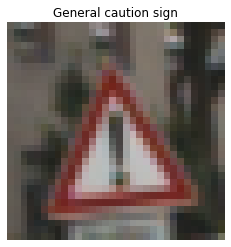

In [26]:
# Display a random sample

random_index = random.randint(0, len(all_data_df) - 1)
sample = all_data_df.iloc[random_index]

image = sample['Image']
sign_name = sample['SignName']

plt.imshow(image)
plt.title(f"{sign_name} sign")
plt.axis('off')
plt.show()

In [16]:
#label_counts = Counter(train_data['labels'])